# This Lab is completed at the end of previous lab. Please scroll down

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to import and clean the data

In [2]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Thanks to ISI for the idea to separate the numeric and Strings variables
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    #print(null_columns)
    #Put 0 in those which have nulls.
    for  Column_to_change in null_columns:
        df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    #print(null_columns)
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('The features in this dataframe are: \n')
    data_frame_output.info(
    )
    return data_frame_output

# Here is Round 3 Starting

In [ ]:
#Here I use the function created in round 2 to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
df_round3_start=DATA_FRAME_CLEAN(data_frame_input)
df_round3_start

In [ ]:
#Here is the description of this dataframe
df_round3_start.describe()

In [ ]:
#Plot the total number of responses by category
df_round3_start['RESPONSE'].hist()
plt.show()
df_round3_start['RESPONSE'].value_counts()

In [ ]:
#Calculate response rate
#I create a table with values 1 and 0 to be able to sum 
df_work=df_round3_start
df_work['RATE_DUM'] = np.where(df_work['RESPONSE'] == 'Yes',1,0)
df_work.sample(10)

In [ ]:
#Print the response rate by sales channel
grouped=df_work.groupby('SALES_CHANNEL')['RATE_DUM'].agg(['sum','count']).reset_index().rename(columns={'sum':'valuesum','count' : 'total_c'})
grouped['RATE']=(grouped['valuesum']/grouped['total_c'])*100
grouped=grouped[['SALES_CHANNEL','RATE']]
#grouped['RATE']=grouped['RATE']=(grouped(sum)/grouped(count))*100
#grouped.plot(kind='bar')
grouped.plot.bar(x='SALES_CHANNEL',y='RATE',color={"red"}) #I like this way to plot. the line above does not plot titles in x axis
plt.title("Response rate by the sales channel")
plt.xlabel('SALES_CHANNEL')
plt.ylabel('RESPONSE RATE')
plt.show()

In [ ]:
#Show distribution of total claim amount by response
data_plot_2 = df_work[(df_work['RESPONSE']=='Yes') | (df_work['RESPONSE'] == 'No')]
sns.boxplot(x='RESPONSE', y='TOTAL_CLAIM_AMOUNT', data=data_plot_2)
plt.show()

In [ ]:
#Show distribution of income by response
data_plot_2 = df_work[(df_work['RESPONSE']=='Yes') | (df_work['RESPONSE'] == 'No')]
sns.boxplot(x='RESPONSE', y='INCOME', data=data_plot_2)
plt.show()

In [ ]:
#Show the rate of response per total claim amount (I have binned the Total claim amount)
#Code from NATI
bins = [0, 200, 400, 600, 1000, 3000]
labels = ['0-200', '200-400', '400-600', '600-1000', '1000-3000']
df_work['binned'] = pd.cut(df_work['TOTAL_CLAIM_AMOUNT'], bins=bins, labels=labels) # Bin the "total_claim_amount" column into ranges
#Calculate the rate per bin
grouped=df_work.groupby('binned')['RATE_DUM'].agg(['sum','count']).reset_index().rename(columns={'sum':'valuesum','count' : 'total_c'})
grouped['RATE']=(grouped['valuesum']/grouped['total_c'])*100
grouped=grouped[['binned','RATE']]
grouped.plot.bar(x='binned',y='RATE',color={"red"}) #I like this way to plot. the line above does not plot titles in x axis
plt.title("Response rate by the total claim amount")
plt.xlabel('TOTAL_CLAIM_AMOUNT')
plt.ylabel('Rate')
plt.show()



In [ ]:
#Show the rate of response per income (I have binned the income)
#Code from NATI
bins = [0, 20000, 34000, 37700, 62000, 100000]
labels = ['0-20000', '20000-34000', '34000-37700', '37700-62000', '62000-100000']
df_work['binned'] = pd.cut(df_work['INCOME'], bins=bins, labels=labels) # Bin the "total_claim_amount" column into ranges
#Calculate the rate per bin
grouped=df_work.groupby('binned')['RATE_DUM'].agg(['sum','count']).reset_index().rename(columns={'sum':'valuesum','count' : 'total_c'})
grouped['RATE']=(grouped['valuesum']/grouped['total_c'])*100
grouped=grouped[['binned','RATE']]
grouped.plot.bar(x='binned',y='RATE',color={"red"}) #I like this way to plot. the line above does not plot titles in x axis
plt.title("Response rate by the Income")
plt.xlabel('Income')
plt.ylabel('RATE')
plt.show()

# Here Starts Round 4

In [3]:
#Here I use the function created in round 2 to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')
df_round4_start=DATA_FRAME_CLEAN(data_frame_input)
df_round4_start

The size for this data frame is:  (9134, 24)
Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES', 'TOTAL_CLAIM_AMOUNT',
       'CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE_TO_DATE', 'EMPLOYMENTSTATUS', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE',
       'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE'],
      dtype='object')
The features in this dataframe are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER_LIFETIME_VALUE        9134 non-null   float64       
 1   INCOME                         9134 non-null   int64         
 2   MONTHLY_PREMIUM_AUTO           9

CUSTOMER_LIFETIME_VALUE  INCOME  MONTHLY_PREMIUM_AUTO  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      MONTHS_SINCE_LAST_CLAIM  MONTHS_SINCE_POLICY_INCEPTION  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      NUMBER_OF_OPEN_COMPLAINTS  NUMBER_OF_POLICIES  TOTAL_CLAIM_AMOUNT  \
0                             0                   1          384.811147   
1                             0                   8         1131.464935   
2                             0                   2          566.472247   
3                             0                   7          529.881344   
4                             0                   1          138.130879   
...                         ...                 ...                 ...   
9129                          0                   2          198.234764   
9130                          0                   1          379.200000   
9131                          3                   2          790.784983   
9132                          0                   3          691.200000   
9133                          0                   1          369.600000   

     CUSTOMER       STATE RESPONSE  COVERAGE EDUCATION EFFECTIVE_TO_DATE  \
0     BU79786  Washington       No     Basic  Bachelor        2011-02-24   
1     QZ44356     Arizona       No  Extended  Bachelor        2011-01-31   
2     AI49188      Nevada       No   Premium  Bachelor        2011-02-19   
3     WW63253  California       No     Basic  Bachelor        2011-01-20   
4     HB64268  Washington       No     Basic  Bachelor        2011-02-03   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor        2011-02-10   
9130  PK87824  California      Yes  Extended   College        2011-02-12   
9131  TD14365  California       No  Extended  Bachelor        2011-02-06   
9132  UP19263  California       No  Extended   College        2011-02-03   
9133  Y167826  California       No  Extended   College        2011-02-14   

     EMPLOYMENTSTATUS GENDER LOCATION_CODE MARITAL_STATUS     POLICY_TYPE  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       D

In [35]:
#Check data types for different columns
X_num = df_round4_start.select_dtypes(include = np.number) #numerical columns
X_cat = df_round4_start.select_dtypes(include = np.object) #categoricals columns
#EFFECTIVE_TO_DATE is deleted as it is either numerical nor Categorical

In [36]:
#Print a sample of numerical features dataframe
X_num.sample(5)

CUSTOMER_LIFETIME_VALUE  INCOME  MONTHLY_PREMIUM_AUTO  \
489               2730.313804   36218                    68   
5755              8029.715047   76081                    68   
2028             13024.130120       0                   125   
424               4177.696973       0                   112   
1180              8084.846371   60662                    68   

      MONTHS_SINCE_LAST_CLAIM  MONTHS_SINCE_POLICY_INCEPTION  \
489                         6                             83   
5755                       14                              3   
2028                        6                             61   
424                         4                             49   
1180                       10                             38   

      NUMBER_OF_OPEN_COMPLAINTS  NUMBER_OF_POLICIES  TOTAL_CLAIM_AMOUNT  
489                           0                   1          145.252168  
5755                          0                   2          384.210821  
2028                          0                   2          900.000000  
424                           0                   1          537.600000  
1180                          0                   2          326.400000

In [37]:
#Print a sample of categorical features dataframe
X_cat.sample(5)

CUSTOMER       STATE RESPONSE  COVERAGE             EDUCATION  \
4048  CP66511      Oregon       No     Basic  High School or Below   
8492  RO77709  California       No     Basic  High School or Below   
6161  LH66741     Arizona       No     Basic              Bachelor   
6495  NZ81536  Washington       No  Extended                Doctor   
7642  WL40338  California      Yes     Basic              Bachelor   

     EMPLOYMENTSTATUS GENDER LOCATION_CODE MARITAL_STATUS     POLICY_TYPE  \
4048         Employed      M         Urban        Married   Personal Auto   
8492         Employed      M         Urban        Married  Corporate Auto   
6161         Employed      M      Suburban        Married   Personal Auto   
6495         Employed      F         Rural         Single   Personal Auto   
7642         Employed      F         Urban        Married   Personal Auto   

            POLICY RENEW_OFFER_TYPE SALES_CHANNEL  VEHICLE_CLASS VEHICLE_SIZE  
4048   Personal L3           Offer2         Agent   Two-Door Car        Small  
8492  Corporate L1           Offer2   Call Center            SUV        Small  
6161   Personal L2           Offer2        Branch  Four-Door Car        Large  
6495   Personal L3           Offer1        Branch            SUV      Medsize  
7642   Personal L1           Offer2         Agent  Four-Door Car      Medsize

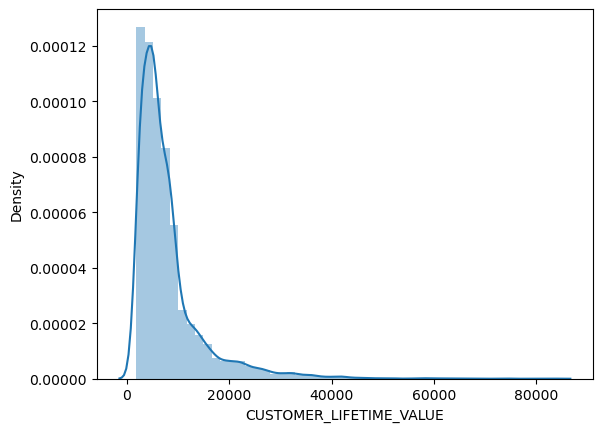

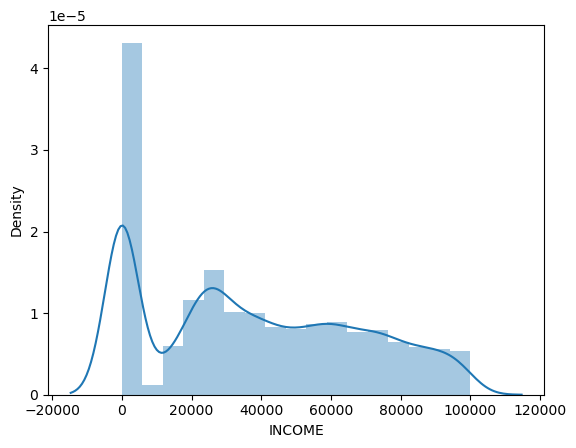

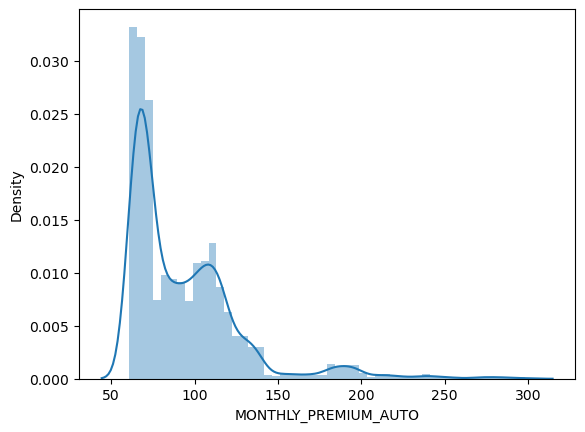

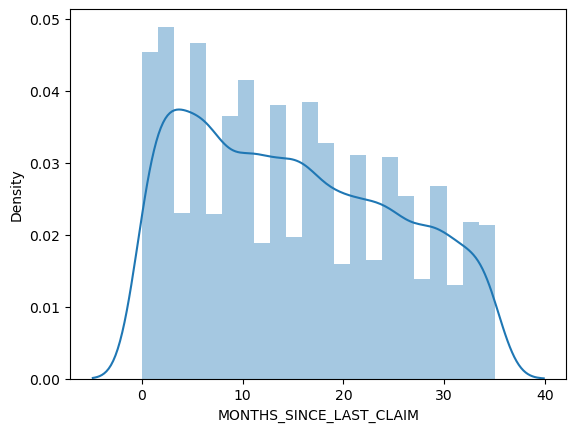

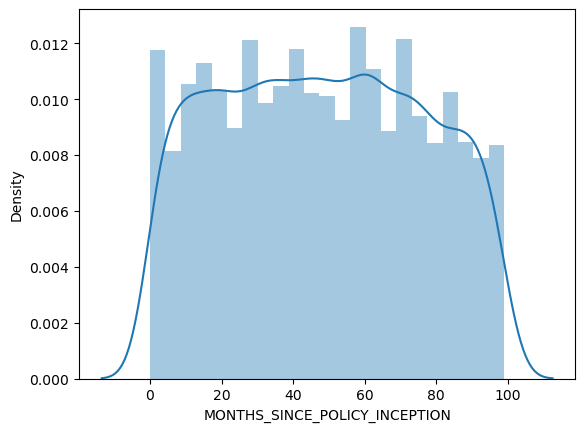

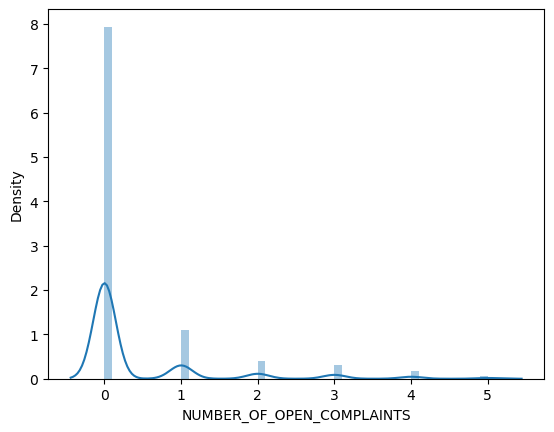

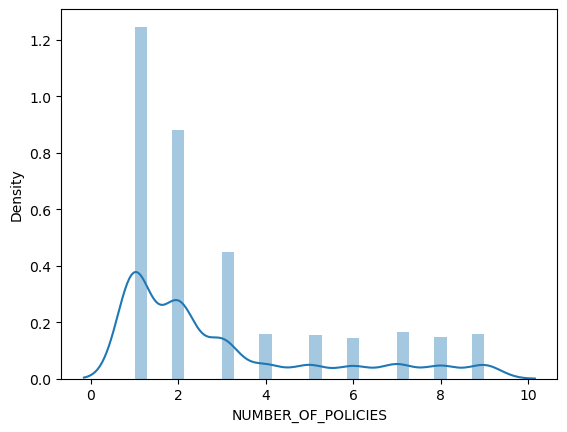

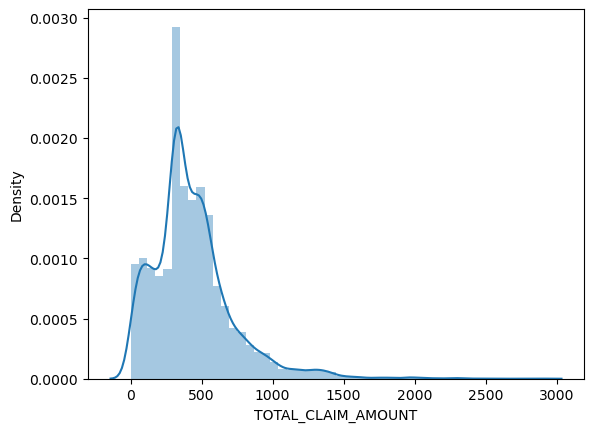

In [38]:
# Print the dristribution plots for the numerical values. 
for column in X_num.columns:
    sns.distplot(X_num[column])
    plt.show()

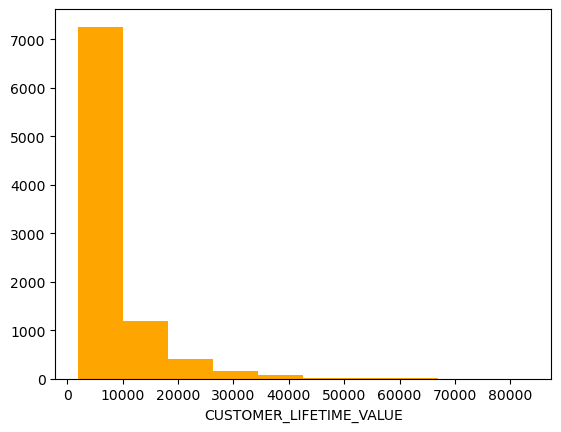

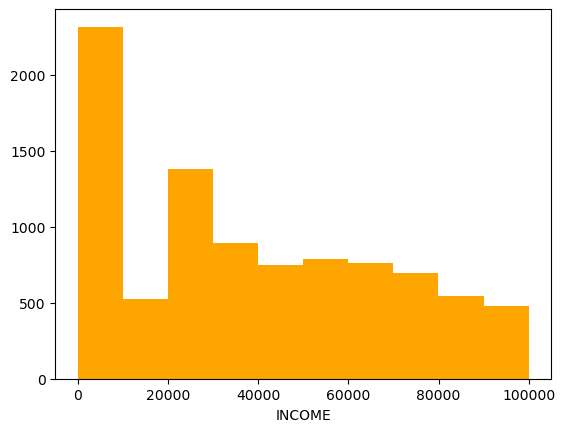

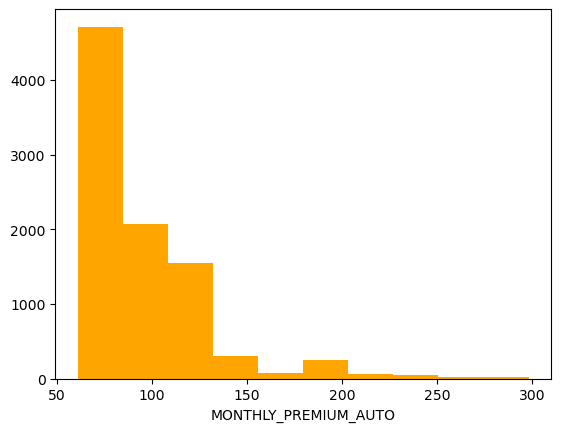

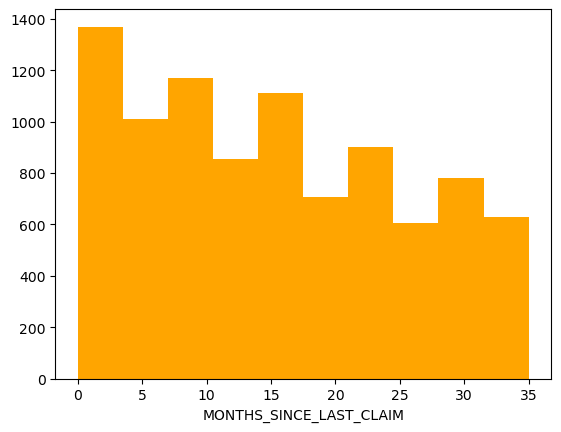

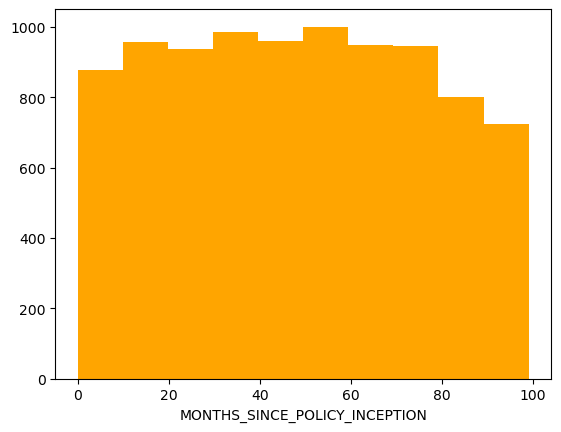

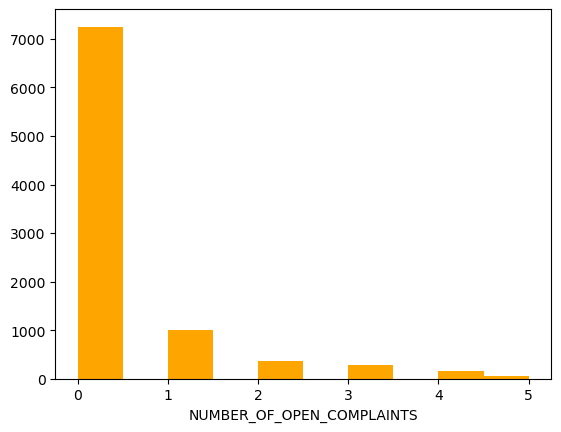

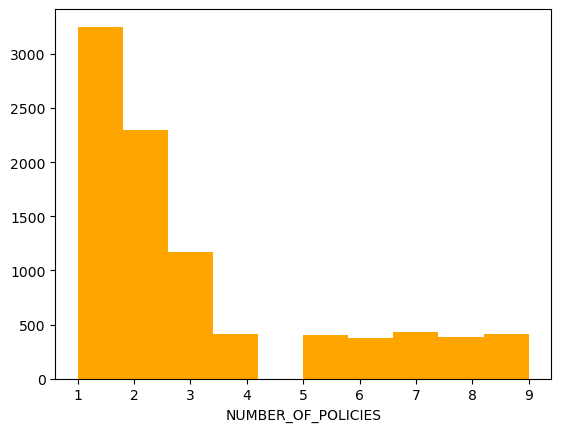

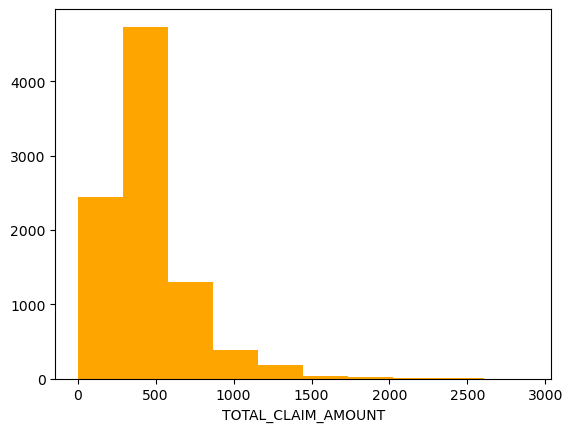

In [39]:
# Print the histograms plots for the numerical values with matplotlib. 
for column in X_num.columns:
    plt.hist(X_num[column],color="orange") #Print
    plt.xlabel(column) #Change x Label
    plt.show()

In [40]:
X_num.columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

<AxesSubplot:xlabel='CUSTOMER_LIFETIME_VALUE'>

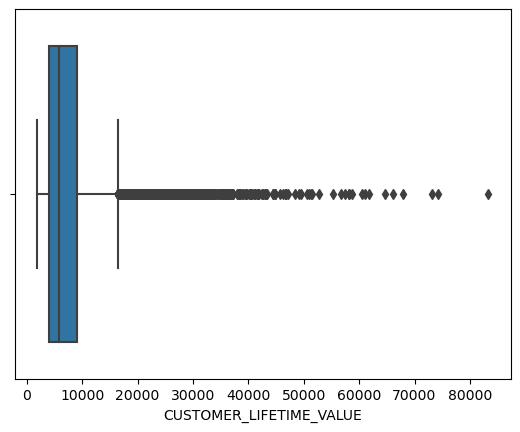

In [55]:
#I remove the outliers from each variable
#Check the outliers
sns.boxplot(x=X_num['CUSTOMER_LIFETIME_VALUE'] ,whis=1.5)
#We keep the outliers. There is a lot of records and I am not sure if I can delete high values of customer lifetime value

In [67]:
iqr = np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],75) - np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],25) # data['IC1'].quantile(0.75)
iqr
# define the limits
upper_limit = np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],75) + 1.5*iqr
lower_limit = np.percentile(X_num['CUSTOMER_LIFETIME_VALUE'],25) - 1.5*iqr
upper_limit, lower_limit


(16414.039911750002, -3457.6210762500014)

<AxesSubplot:xlabel='INCOME'>

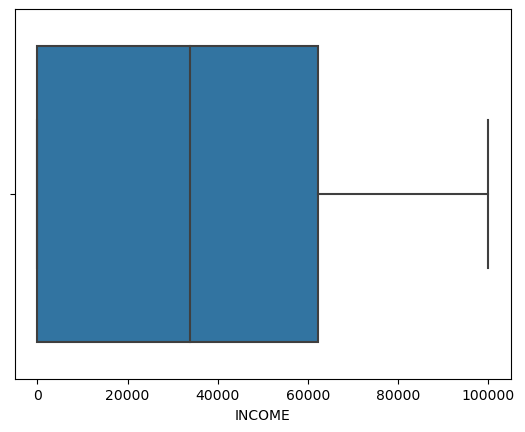

In [56]:
#Check the outliers
sns.boxplot(x=X_num['INCOME'] ,whis=1.5)

<AxesSubplot:xlabel='MONTHLY_PREMIUM_AUTO'>

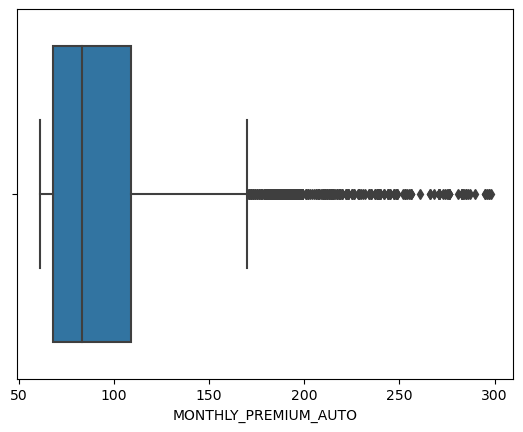

In [57]:
#Check the outliers
sns.boxplot(x=X_num['MONTHLY_PREMIUM_AUTO'] ,whis=1.5)

<AxesSubplot:xlabel='MONTHS_SINCE_LAST_CLAIM'>

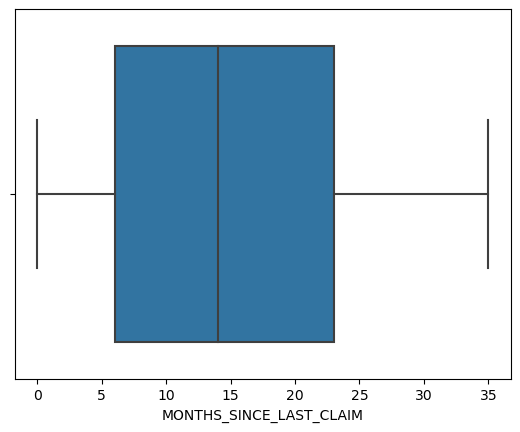

In [58]:
#Check the outliers
sns.boxplot(x=X_num['MONTHS_SINCE_LAST_CLAIM'] ,whis=1.5)

<AxesSubplot:xlabel='MONTHS_SINCE_POLICY_INCEPTION'>

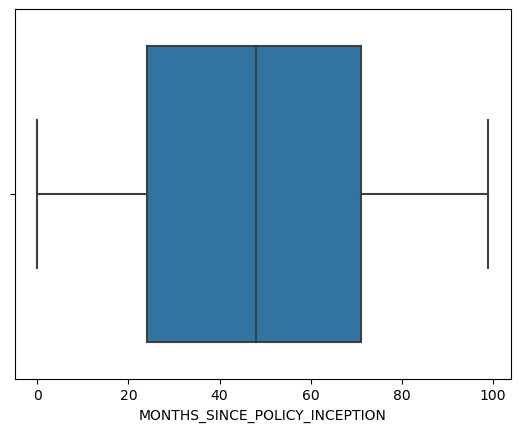

In [59]:
#Check the outliers
sns.boxplot(x=X_num['MONTHS_SINCE_POLICY_INCEPTION'] ,whis=1.5)

<AxesSubplot:xlabel='NUMBER_OF_POLICIES'>

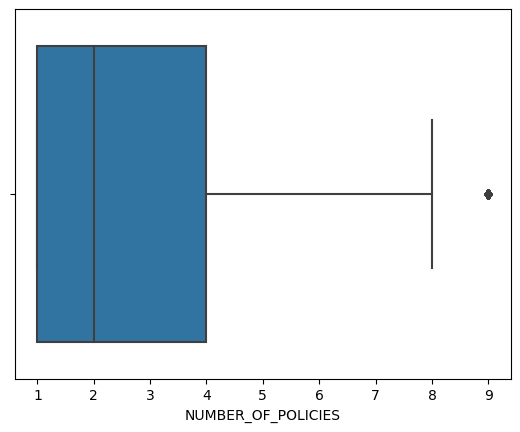

In [60]:
#Check the outliers
sns.boxplot(x=X_num['NUMBER_OF_POLICIES'] ,whis=1.5)
#Do not remove this is a numerical discrete

<AxesSubplot:xlabel='TOTAL_CLAIM_AMOUNT'>

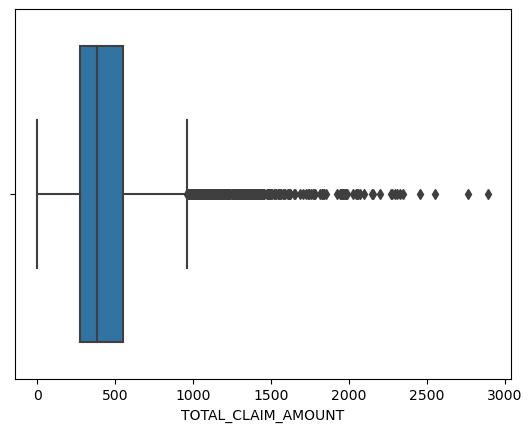

In [61]:
#Check the outliers
sns.boxplot(x=X_num['TOTAL_CLAIM_AMOUNT'] ,whis=1.5)

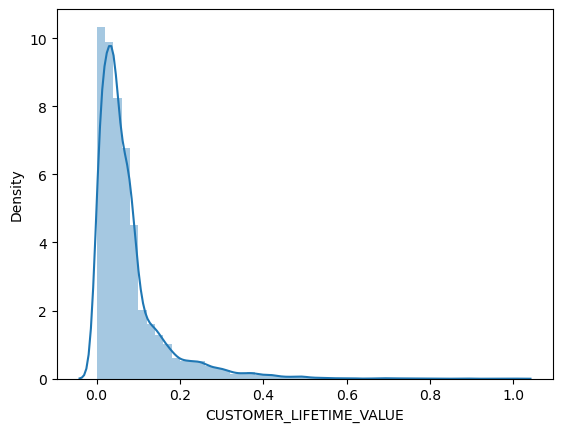

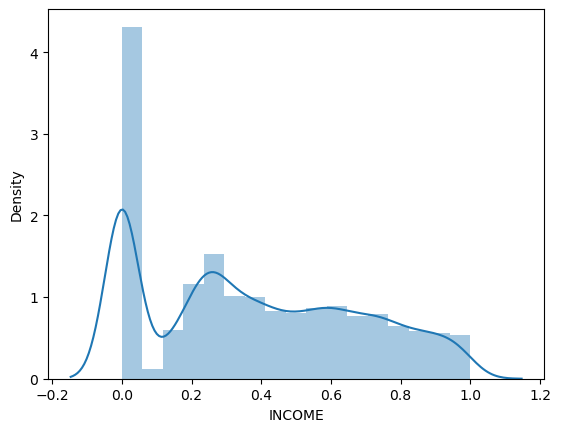

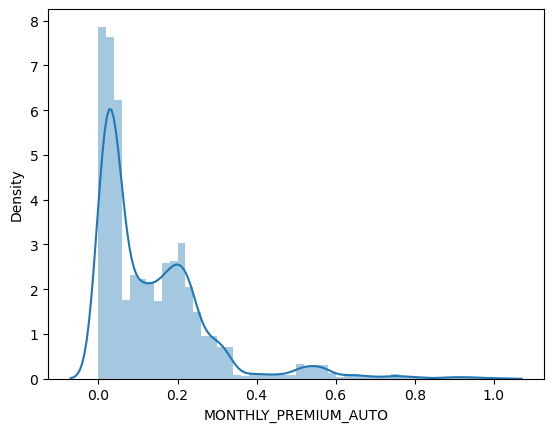

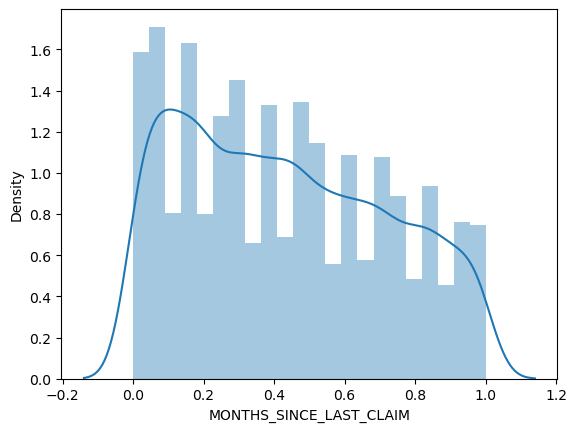

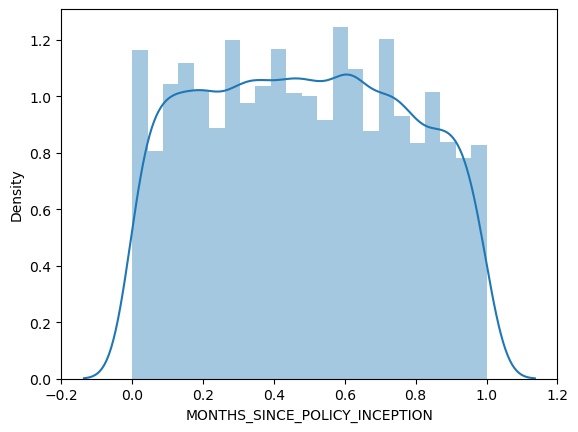

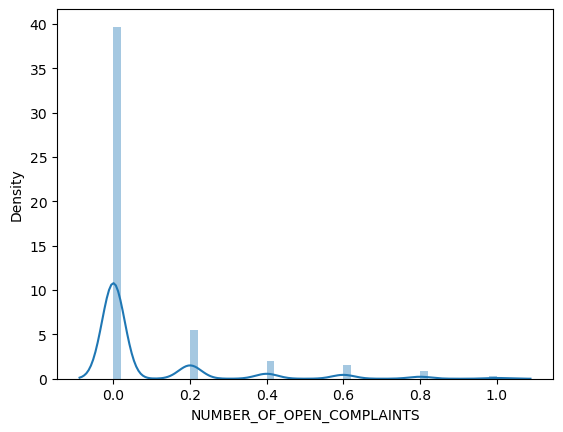

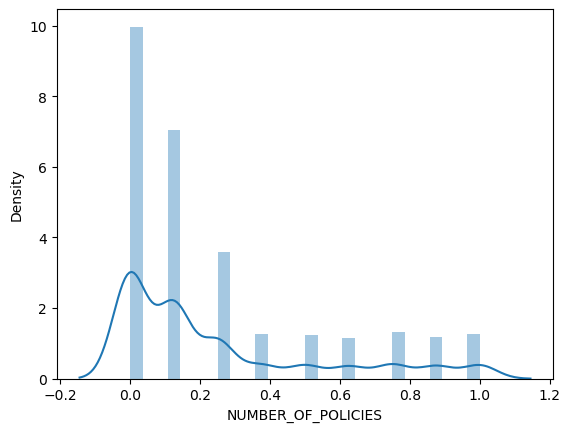

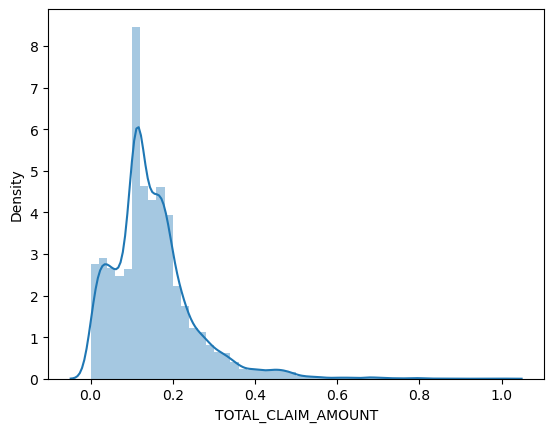

In [69]:
##There are different methods to do this transformation
#I start with Normalization MinMax we put the range between 0 and 1

transformer = MinMaxScaler().fit(X_num) 
x_minmax = transformer.transform(X_num) #Array
X_num_minmax = pd.DataFrame(x_minmax,columns=X_num.columns) ## Convert to dataframe

# Print the dristribution plots for the numerical values. 
for column in X_num_minmax.columns:
    sns.distplot(X_num_minmax[column])
    plt.show()

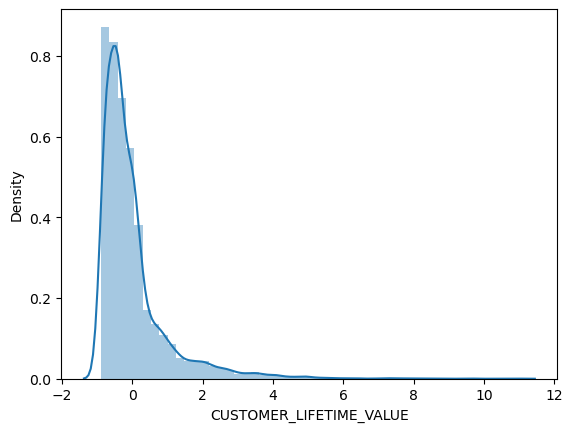

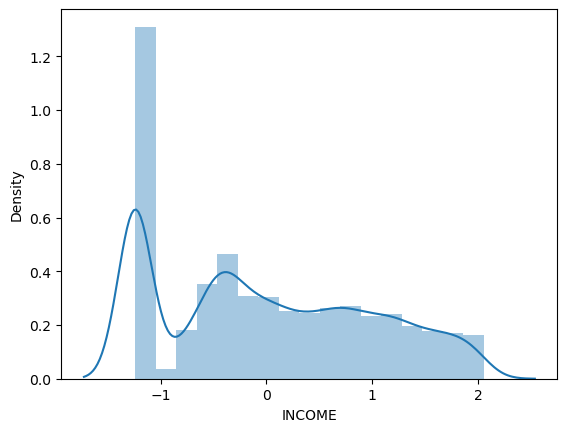

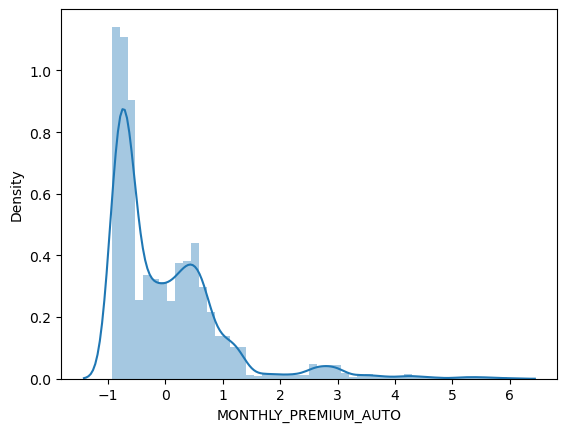

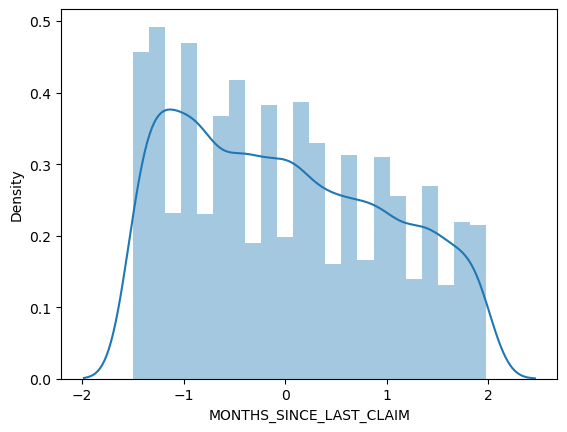

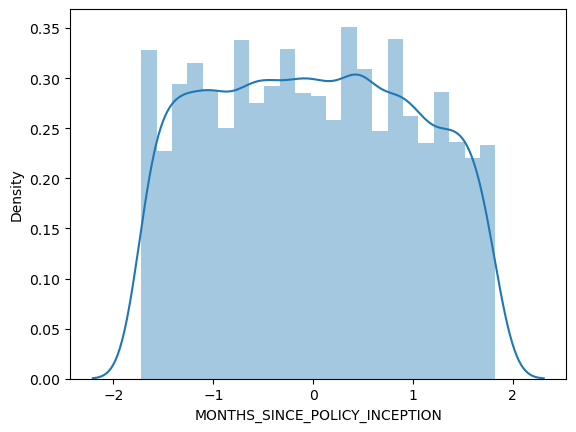

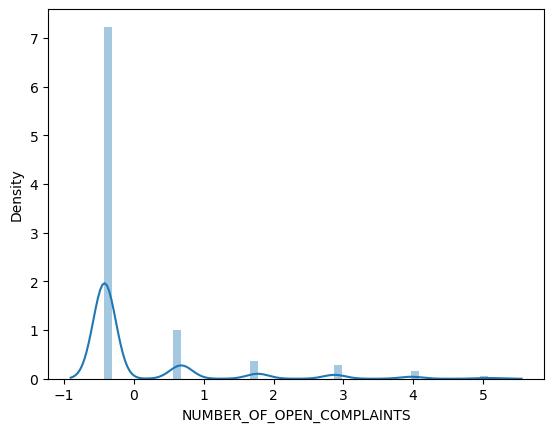

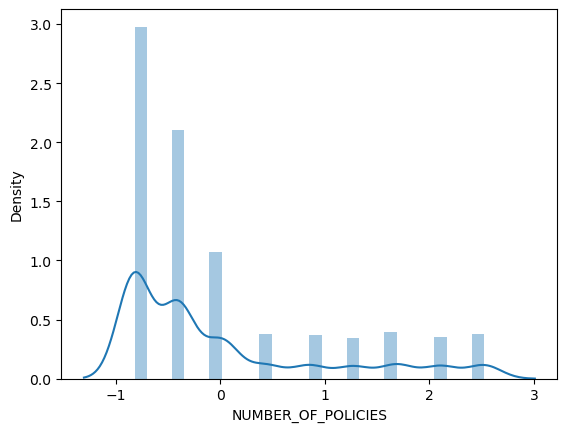

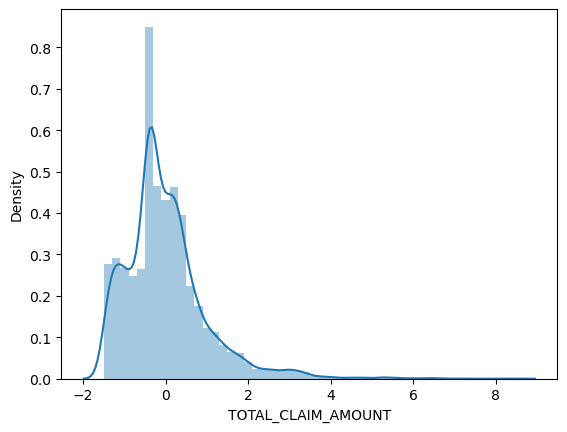

In [71]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use Standarization to put the mean in 0

transformer = StandardScaler().fit(X_num_minmax)
x_standardized = transformer.transform(X_num_minmax)
X_num_stand = pd.DataFrame(x_standardized, columns=X_num_minmax.columns)

# Print the dristribution plots for the numerical values. 
for column in X_num_stand.columns:
    sns.distplot(X_num_stand[column])
    plt.show()

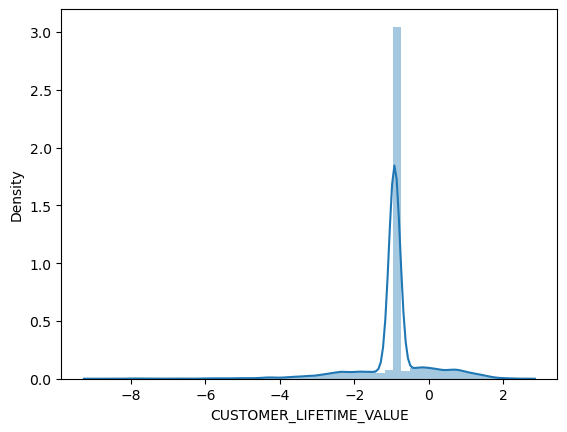

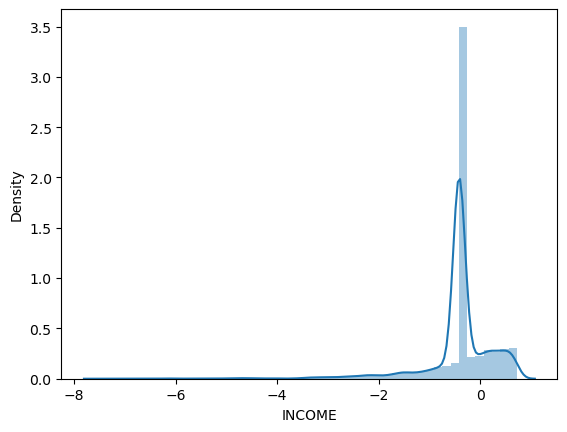

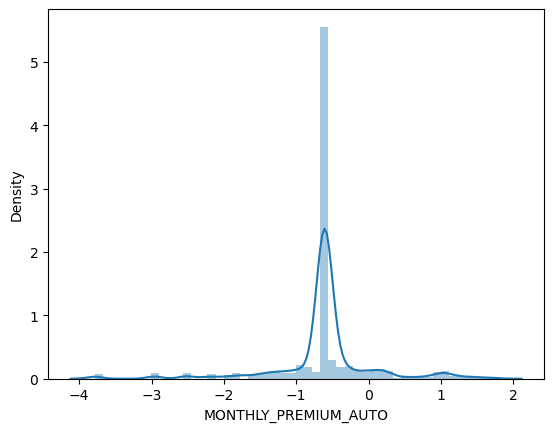

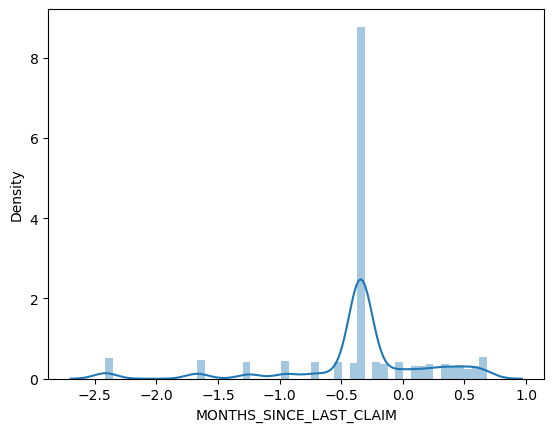

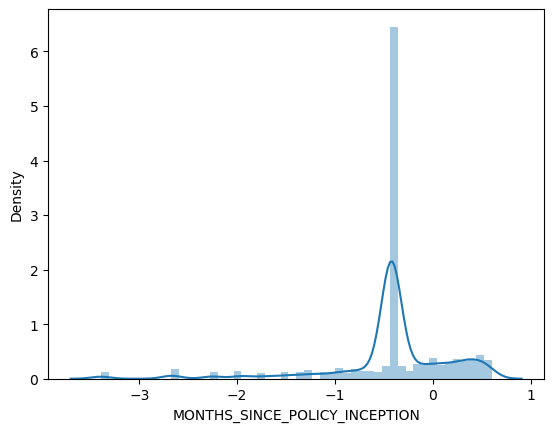

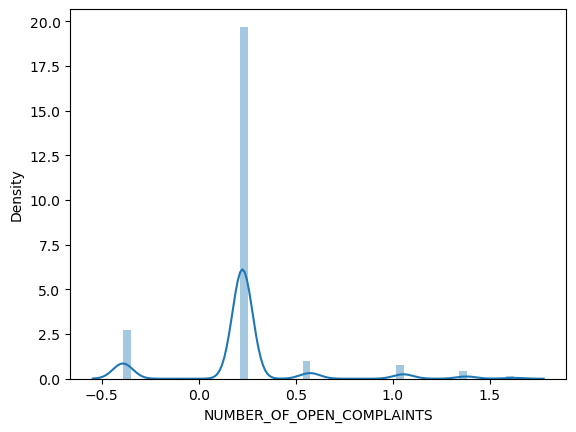

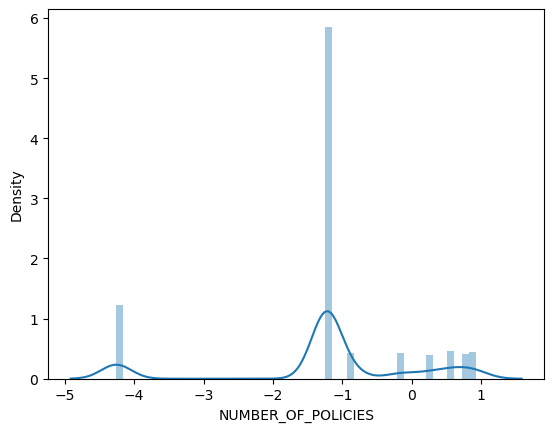

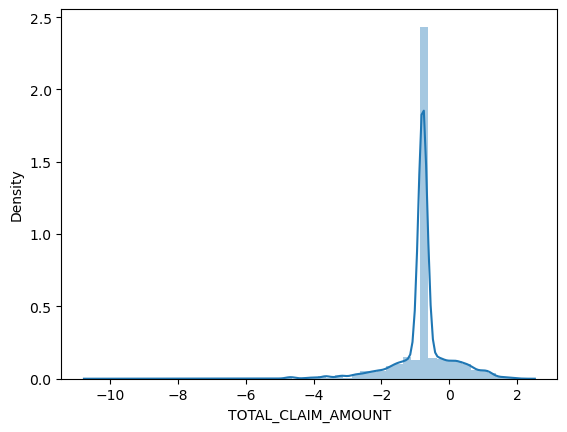

In [72]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use Log Transformation
X_num_log=X_num_stand
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # or with np.NAN to change it to the mean afterwards with .fillna()

for column in X_num_log.columns:
    X_num_log[column] = list(map(log_transfom_clean, X_num_log[column])) #Transformation
    X_num_log[column] = X_num_log[column].fillna(np.mean(X_num_log[column]))    #Clean NAN
    
# Print the dristribution plots for the numerical values. 
for column in X_num_log.columns:
    sns.distplot(X_num_log[column])
    plt.show()

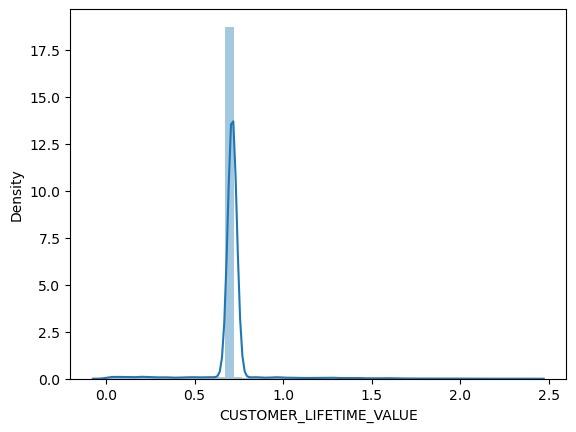

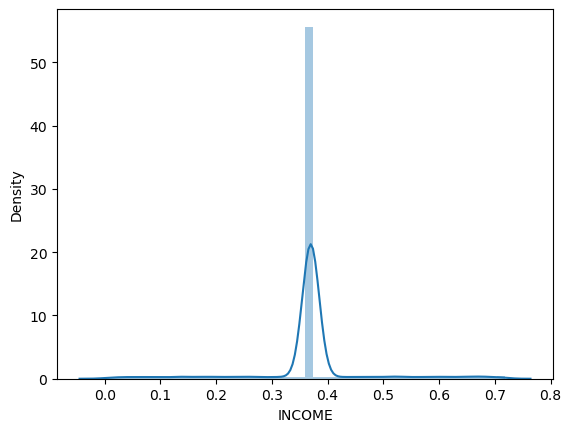

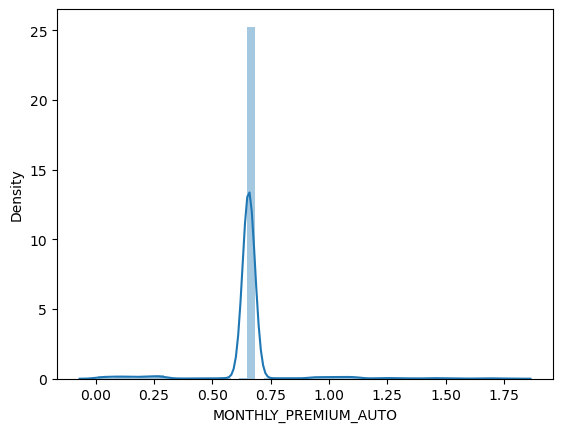

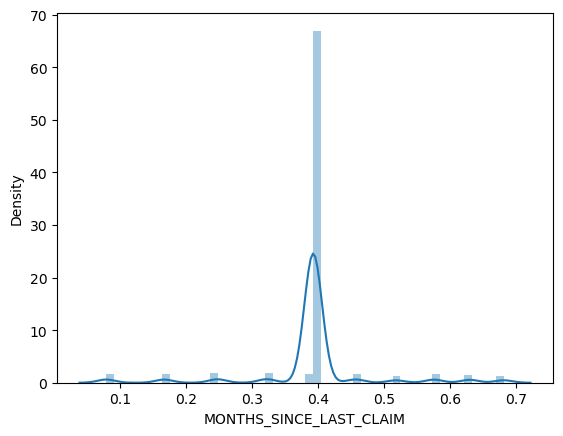

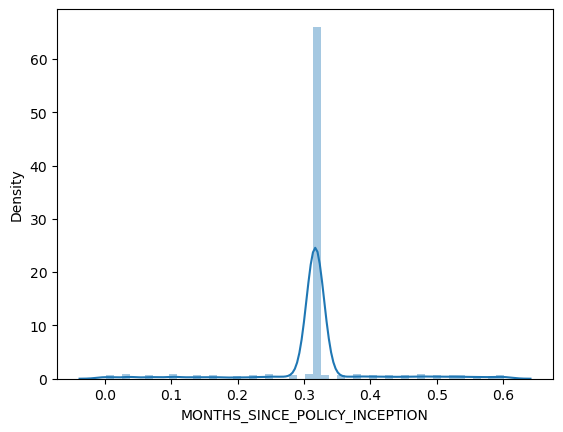

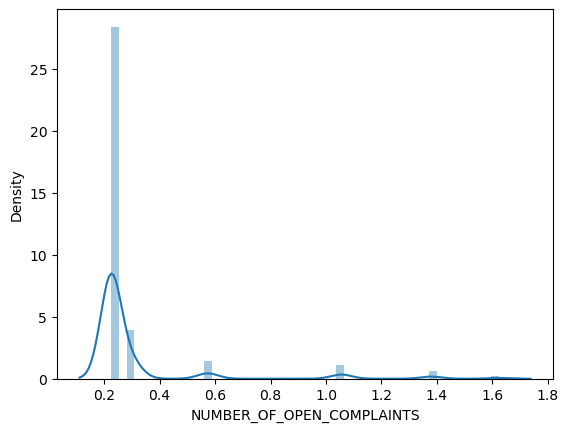

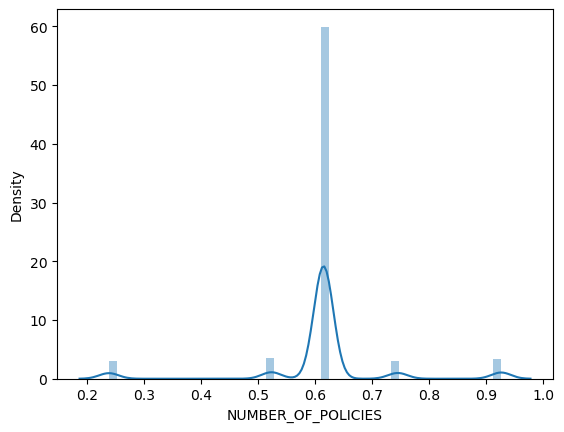

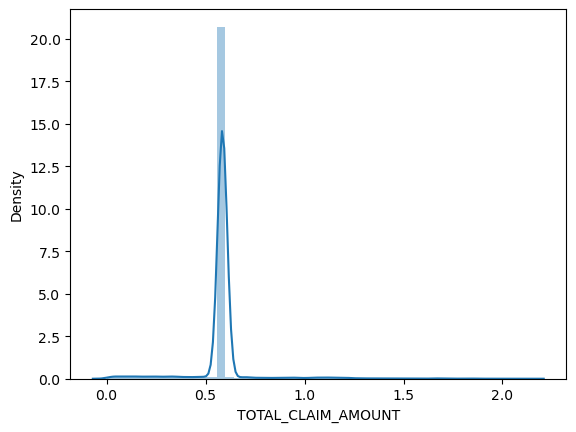

In [74]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
X_num_BC=X_num_stand


for column in X_num_BC.columns:
    X_num_BC[column] = np.where(X_num_BC[column]<=0, np.NAN, X_num_BC[column]) # data['HV1'].mean()
    X_num_BC[column] = X_num_BC[column].fillna(X_num_BC[column].mean())
    transformed_data, _ci = stats.boxcox(X_num_BC[column])
    
# Print the dristribution plots for the numerical values. 
for column in X_num_BC.columns:
    sns.distplot(X_num_BC[column])
    plt.show()

# Check the multicollinearity

In [75]:
#I separaty total_claim_amount
X_Target=X_num['TOTAL_CLAIM_AMOUNT']
X_num=X_num.drop(columns='TOTAL_CLAIM_AMOUNT')
X_num.sample(4)

CUSTOMER_LIFETIME_VALUE  INCOME  MONTHLY_PREMIUM_AUTO  \
4047              4990.343538       0                    71   
7462              4983.114656       0                   133   
7877              2598.061204   62566                    65   
2487              4185.757242       0                    64   

      MONTHS_SINCE_LAST_CLAIM  MONTHS_SINCE_POLICY_INCEPTION  \
4047                        3                             84   
7462                        9                             85   
7877                        4                              3   
2487                        0                             56   

      NUMBER_OF_OPEN_COMPLAINTS  NUMBER_OF_POLICIES  
4047                          0                   6  
7462                          0                   1  
7877                          1                   1  
2487                          0                   3

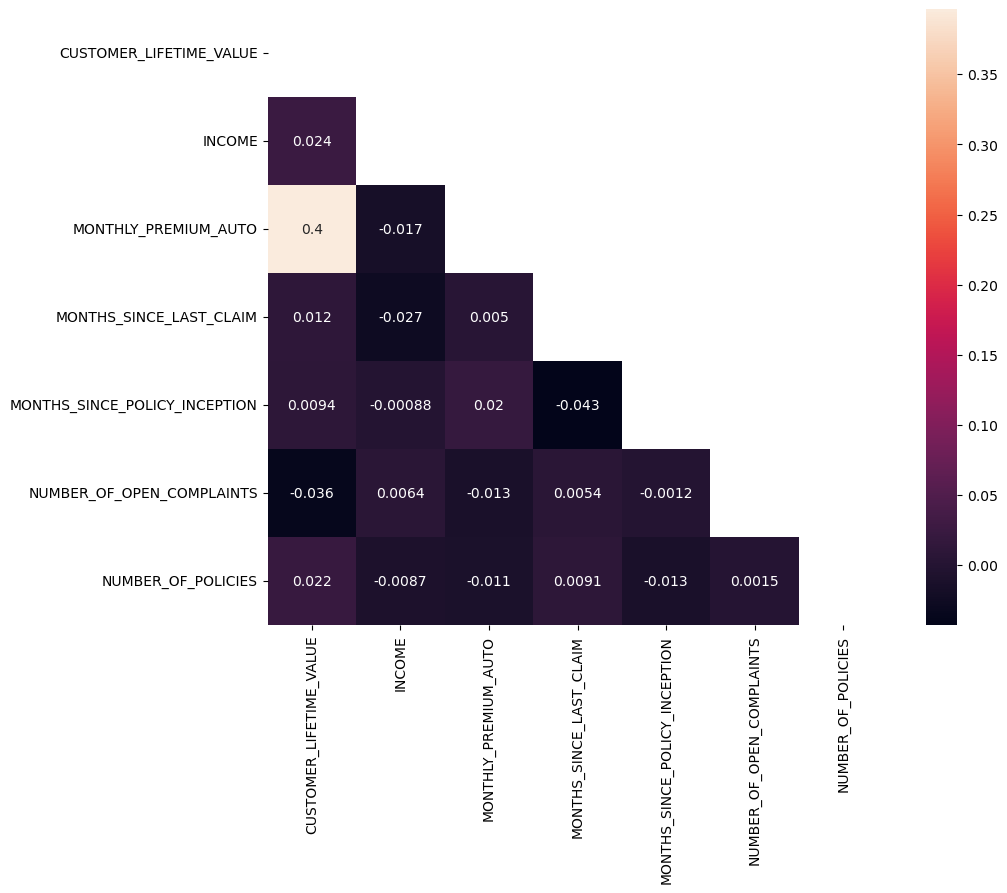

In [78]:
#Check correlation for each feature agaisnt each other
correlations_matrix = X_num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

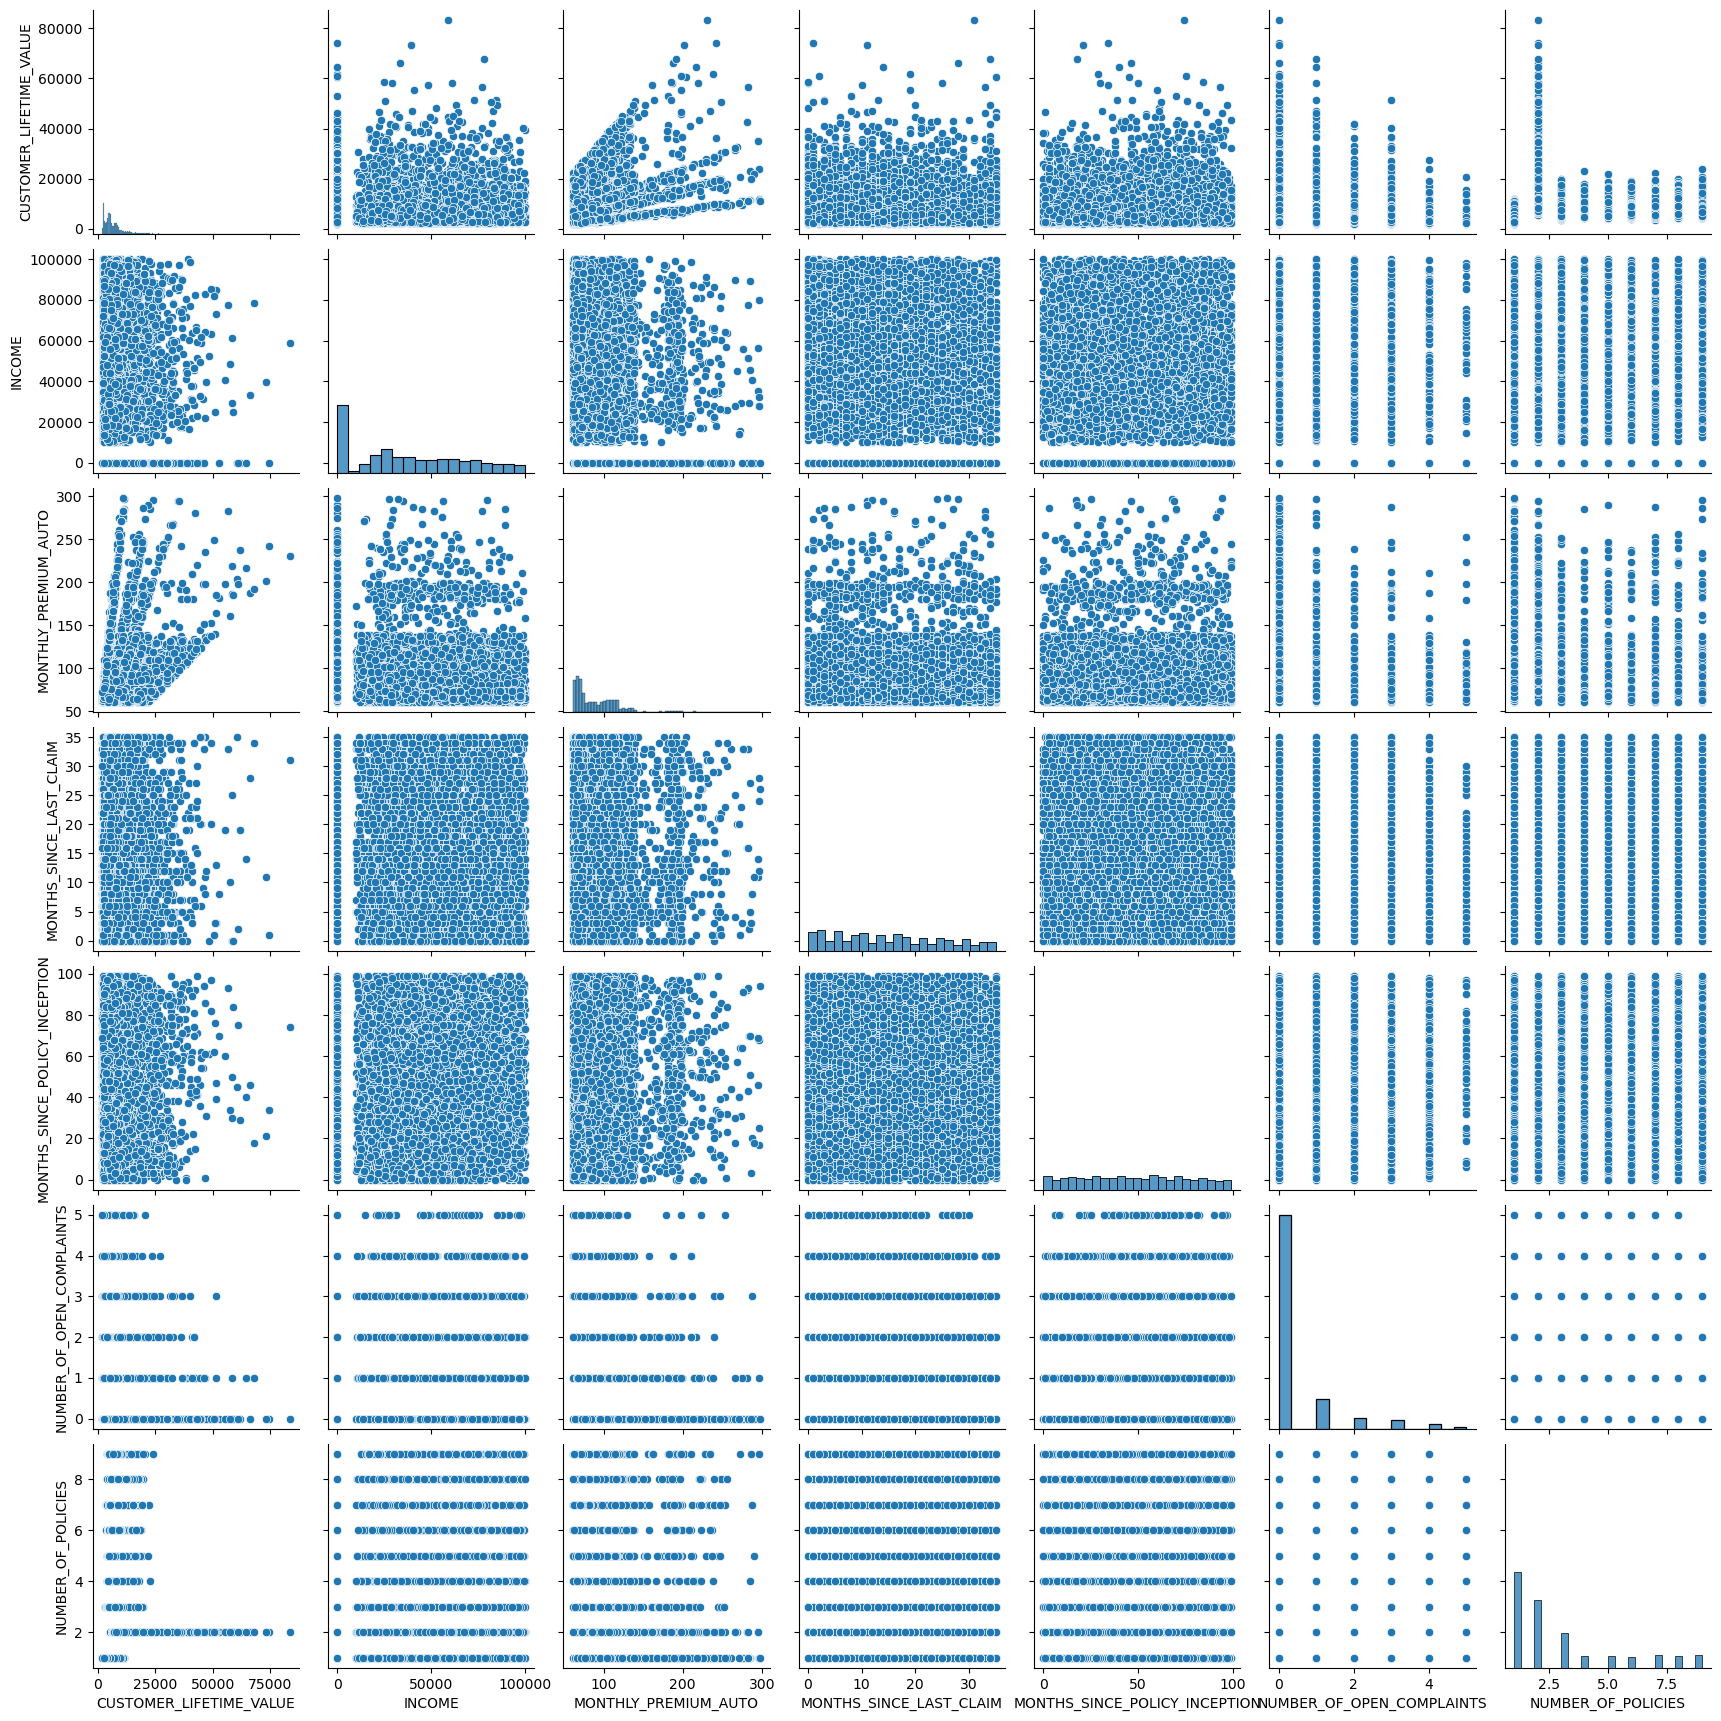

In [79]:
sns.pairplot(X_num)

#There is no strong correlation between variables

In [ ]:
##Moreover number_of_policies and number_of_open_complaints are numerical discrete variables and
#They don´t have to be in a normal distribution. 
#Customer_lifetime_value and monthly_premium auto have a relation but we would need to cluster the diferent lines that we see in the graph above